# Module 09 – Panorama Stitching Using OpenCV    [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1Q_rtiJMq_BA_i2FIVo9BozxNAX7tYCBF?usp=sharing)


In this notebook, we demonstrate how to automatically stitch multiple overlapping images into a single wide-view panorama using OpenCV’s built-in stitching algorithm.

### 🔧 Workflow Overview:
This process involves the following key steps:

1. **Importing Required Libraries**  
   We load OpenCV, matplotlib, and other utilities to handle image processing and visualization.

2. **Reading Images from a Folder**  
   We use the `glob` module to collect file paths from a specified folder containing the images to be stitched.

3. **Converting Images from BGR to RGB**  
   Since OpenCV reads images in BGR format by default, we convert them to RGB for correct display using `matplotlib`.

4. **Storing Converted Images**  
   Each RGB image is appended to a list, which will later be passed to the stitching function.

5. **Displaying the Input Images**  
   We visualize the loaded images in a grid layout to verify their order and overlap before stitching.

6. **Panorama Stitching with OpenCV**  
   Using `cv2.Stitcher_create()`, we run OpenCV’s built-in stitching pipeline, which handles feature detection, matching, alignment, and blending internally.

---

This end-to-end flow lets us automate the panorama creation task with minimal manual effort.




##Libraries
Before working with panorama stitching, we need to import the essential Python libraries:

- `cv2` (OpenCV): For image processing operations like reading images, detecting features, and stitching.
- `matplotlib.pyplot`: To visualize images and debug feature matches or transformations.
- `math`: For performing mathematical operations such as angle or distance calculations.
- `glob`: To collect file paths of multiple images using wildcards (e.g., for batch loading image sets).

These libraries set the foundation for loading, processing, and visualizing images during panorama creation.


In [ ]:
#Importation of librabries
import cv2
import matplotlib.pyplot as plt
import math
import glob

## Reading and Preparing Images from Folder

We use `glob.glob('boat/*')` to collect all file paths from the `boat/` folder. It acts like a file search using wildcards, grabbing all matching images without manually listing them.

Sorting the list ensures that images are loaded in the correct order, which is essential when stitching them together in sequence.

OpenCV's `cv2.imread()` reads each image, but by default, it loads in **BGR color format** (used internally by OpenCV). To make it compatible with libraries like `matplotlib`, we convert each image to **RGB** using `cv2.cvtColor(..., cv2.COLOR_BGR2RGB)`.

Each converted image is then stored in a list for further processing.


In [ ]:
#Reading Image
imagefiles=glob.glob('boat/*') #glob is used for accessing the whole folder
imagefiles.sort()

#Creating empty list where when rgb converted files gets stored after appending
images=[]

for imagefile in imagefiles:
  img=cv2.imread(imagefile) #Reading
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)#Conversion
  images.append(img)

image_number=len(images)#length of the picture
#print(image_number)


## Displaying Loaded Images in a Grid

To visualize all input images at once, we use a grid layout with `matplotlib`.

- `plt.figure(figsize=[30,10])`: Sets the size of the whole figure. A large width helps show multiple images clearly side by side.
- `math.ceil(image_number / col)`: Calculates how many rows are needed based on the total number of images and desired number of columns. `ceil` ensures we round **up** in case the number of images isn't perfectly divisible — this avoids layout errors.

Inside the loop:
- `plt.subplot(row, col, i+1)`: Places each image in its grid cell. `i+1` is used because `subplot` indexing starts from **1**, not 0.
- `plt.axis('off')`: Hides axes for cleaner image display.
- `plt.title(i)`: Adds an index number as a title for each image — useful for tracking during debugging.
- `plt.imshow(images[i])`: Displays the RGB image stored earlier.


## Stitching the Images into a Panorama

We use OpenCV’s built-in panorama stitcher to automatically align and merge the images.

- `cv2.Stitcher_create()`: Initializes the stitching pipeline. This internally uses feature detection, matching, homography estimation, and image warping.

- `stitcher.stitch(images)`: Takes the list of images and attempts to stitch them into a single wide panorama.  
  It returns two outputs:
  - `status`: An integer code indicating success (`0`) or failure (`>0`). Each error code corresponds to a specific issue (e.g., not enough matches).
  - `panorama`: The final stitched image if stitching was successful.

If `status == 0`, stitching was successful, and we display the result using `matplotlib`.


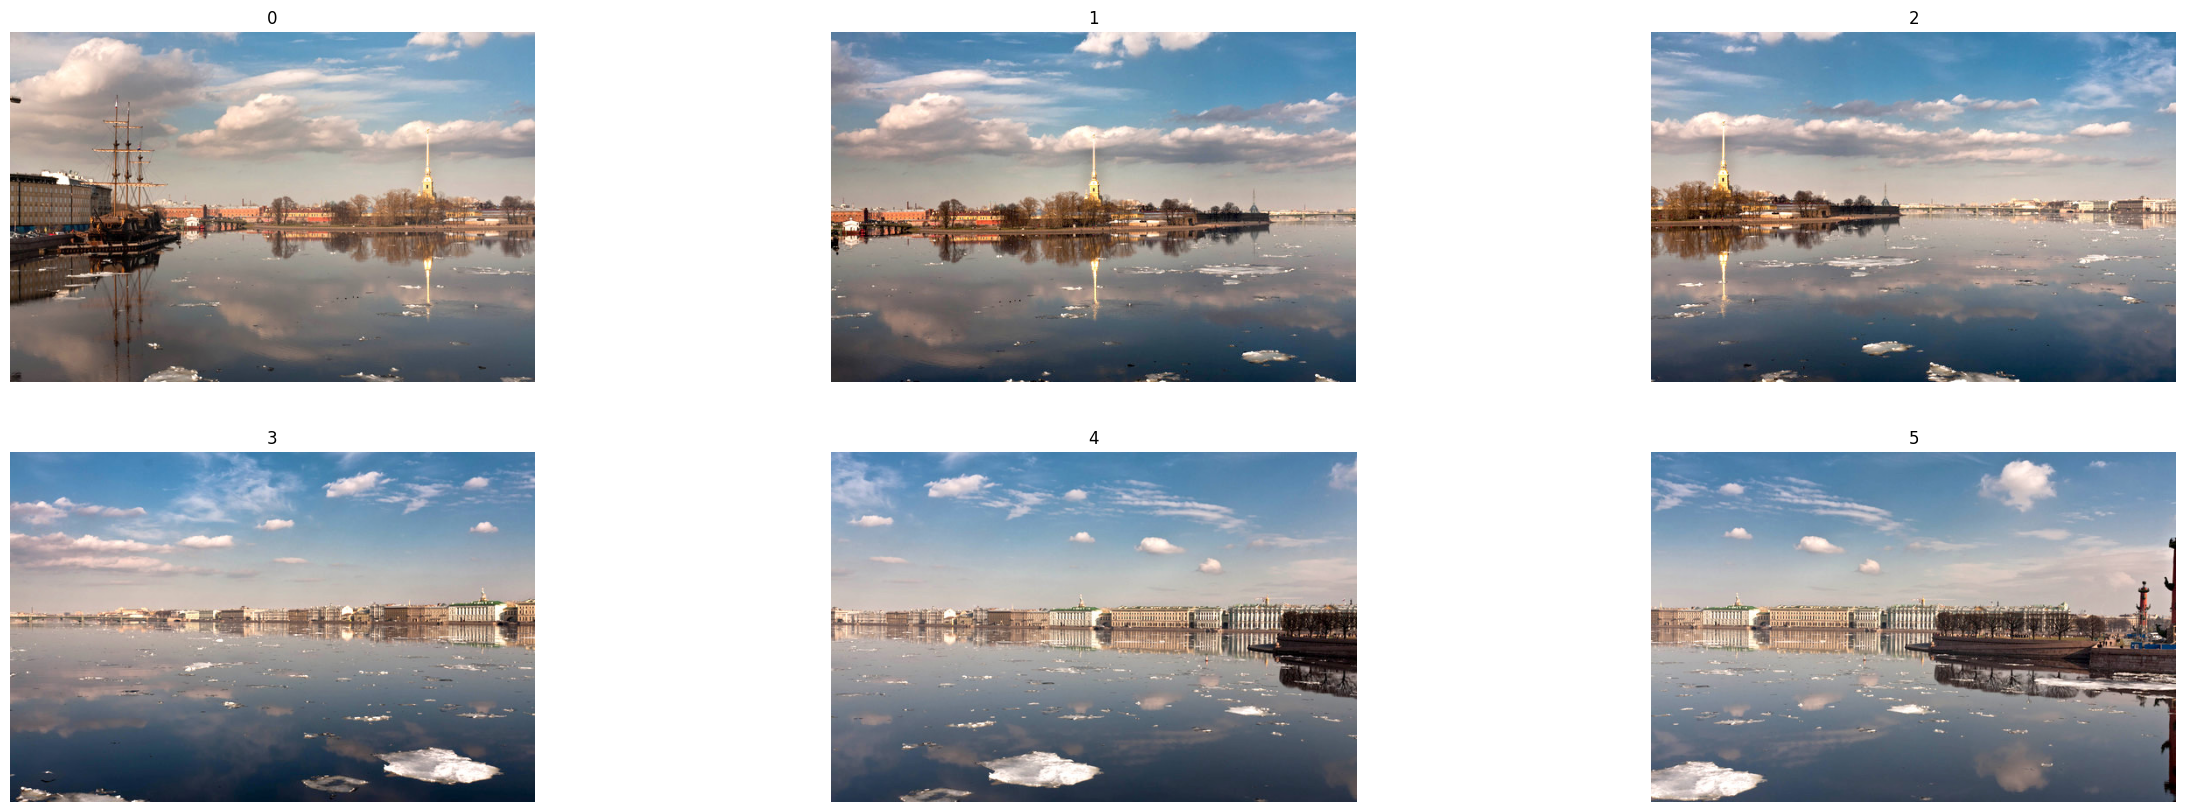

In [ ]:
#Displaying Images
plt.figure(figsize=[30,10])
col=3
row=math.ceil(image_number/col) #As here image number is 6 / 3(col number);ceil here do not let the odd number th create error and round up to bigger
#Loop
for i in range(0,image_number):
  plt.subplot(row,col,i+1) ;plt.axis('off');plt.title(i)#Whats i+1 arg?
  plt.imshow(images[i]) #Our empth list with images



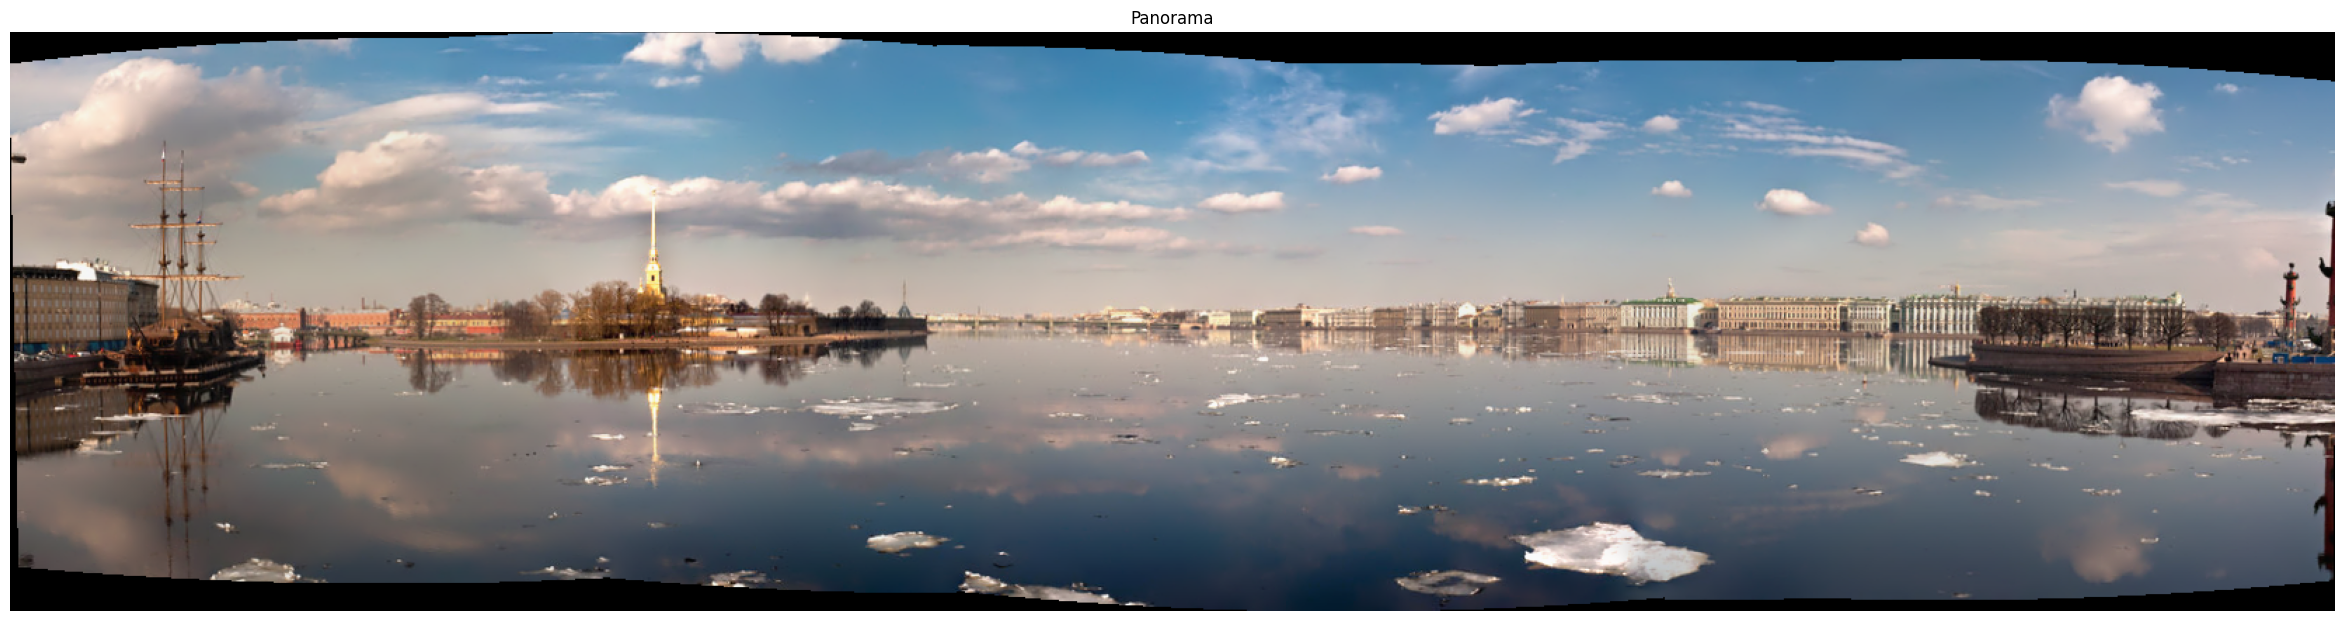

In [ ]:
#Stitching
stitcher=cv2.Stitcher_create()
status,panorama=stitcher.stitch(images) #List of images, whats, status tuple that stich() function returns?
if status==0:
  plt.figure(figsize=[30,10]);plt.axis('off');plt.title("Panorama",loc='center',)
  plt.imshow(panorama)

## 🔗 Navigation

[![⬅️ Module 08](https://img.shields.io/badge/Module-08-blue?style=for-the-badge&logo=github)](https://github.com/Adityeah18/opencv/tree/main/08)
&nbsp;&nbsp;&nbsp;
[![➡️ Module 10](https://img.shields.io/badge/Module-10-blue?style=for-the-badge&logo=github)](https://github.com/Adityeah18/opencv/tree/main/1)
